In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression ,Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [ ]:
cols={'W':'Win', 'R':'Runs_scored', 'AB' : 'At_bat' , 'H' : 'hit', '2B' : 'Double', '3B':'Triple',\
 'HR':'Home_runs','BB':'Base_on_balls', 'SO': 'Strike_out','SB':'Stolen_base','RA':'Run_average','ER':'Earned_runs', 'ERA':'Earned_runs_average','CG':'Complete_game','SHO':'Shoutout','SV':'Save','E':'Errors'}

In [ ]:
df.rename(cols,axis=1,inplace=True)

In [ ]:
df

,Win,Runs_scored,At_bat,hit,Double,Triple,Home_runs,Base_on_balls,Strike_out,Stolen_base,Run_average,Earned_runs,Earned_runs_average,Complete_game,Shoutout,Save,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [ ]:
df.shape

(30, 17)

# **PRIMARY INSPECTION**

In [ ]:
df.describe()

,Win,Runs_scored,At_bat,hit,Double,Triple,Home_runs,Base_on_balls,Strike_out,Stolen_base,Run_average,Earned_runs,Earned_runs_average,Complete_game,Shoutout,Save,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Using Describe method we have identify that mean and median have very less difference between each other so it means that the data (columns) are not skewed  That is : Our data is normally distributed

**Observations:**

1.  All the columns are numerical *values*
   






In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Win                  30 non-null     int64  
 1   Runs_scored          30 non-null     int64  
 2   At_bat               30 non-null     int64  
 3   hit                  30 non-null     int64  
 4   Double               30 non-null     int64  
 5   Triple               30 non-null     int64  
 6   Home_runs            30 non-null     int64  
 7   Base_on_balls        30 non-null     int64  
 8   Strike_out           30 non-null     int64  
 9   Stolen_base          30 non-null     int64  
 10  Run_average          30 non-null     int64  
 11  Earned_runs          30 non-null     int64  
 12  Earned_runs_average  30 non-null     float64
 13  Complete_game        30 non-null     int64  
 14  Shoutout             30 non-null     int64  
 15  Save                 30 non-null     int64

**Observation**

2.   There are no string values and none of the columns has any missing values




In [ ]:
#checking for nulls
df.isnull().sum()

Win                    0
Runs_scored            0
At_bat                 0
hit                    0
Double                 0
Triple                 0
Home_runs              0
Base_on_balls          0
Strike_out             0
Stolen_base            0
Run_average            0
Earned_runs            0
Earned_runs_average    0
Complete_game          0
Shoutout               0
Save                   0
Errors                 0
dtype: int64

# **2.EDA**

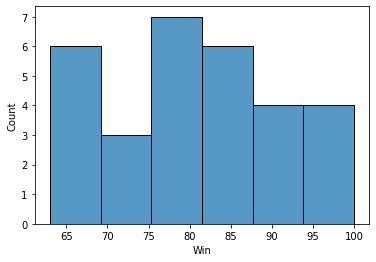

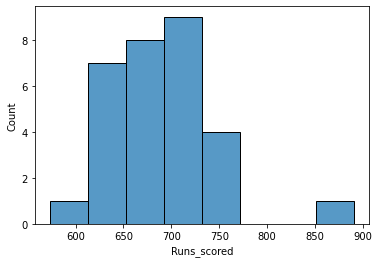

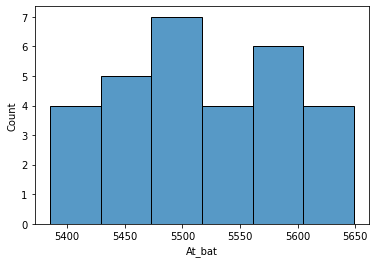

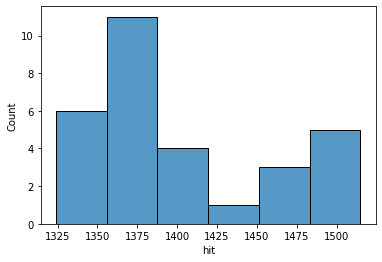

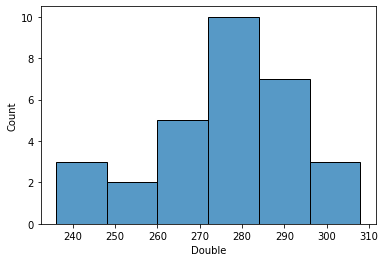

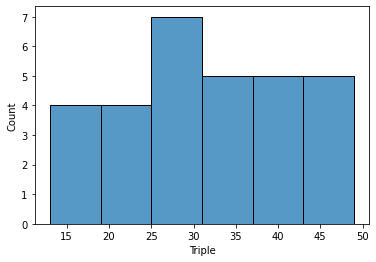

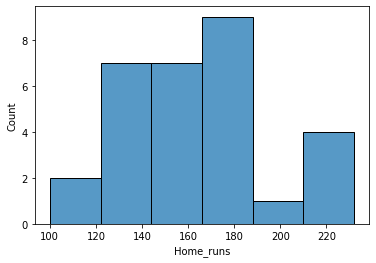

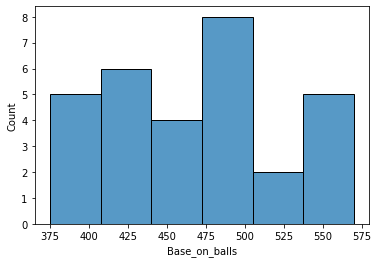

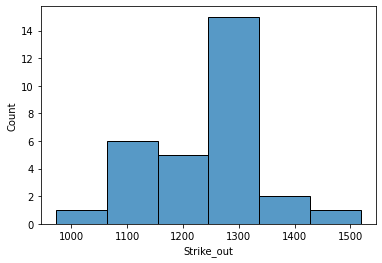

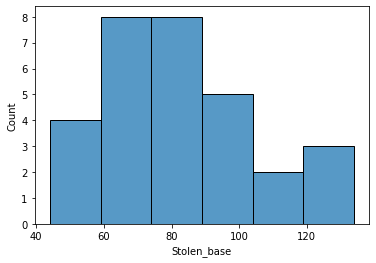

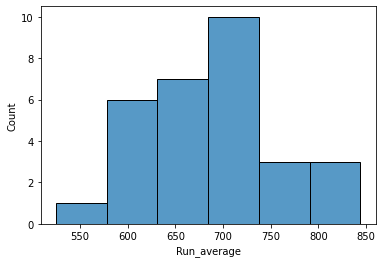

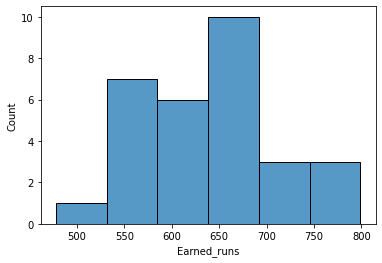

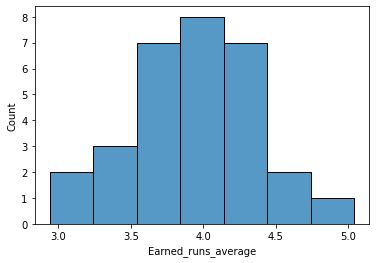

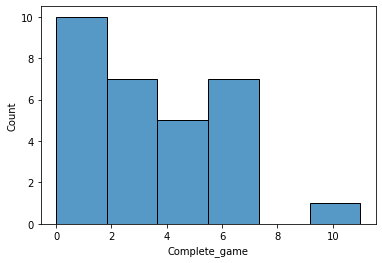

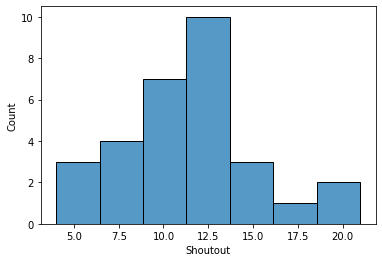

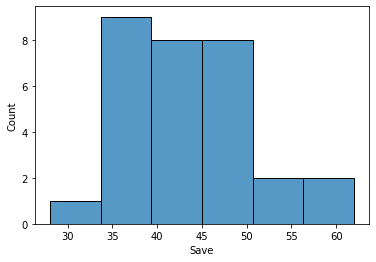

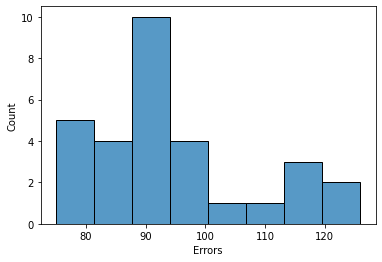

In [ ]:
# first trying with Histplot
for i in df.columns:
  sns.histplot(df[i])
  plt.show()

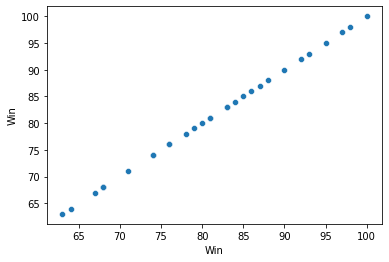

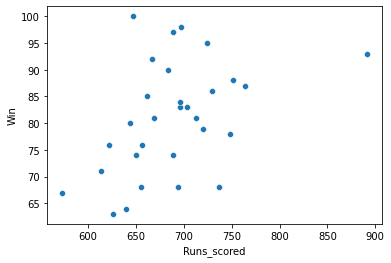

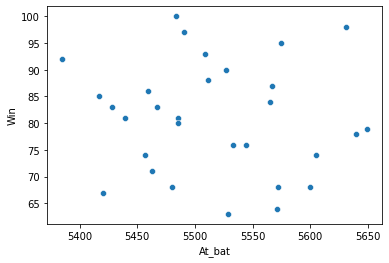

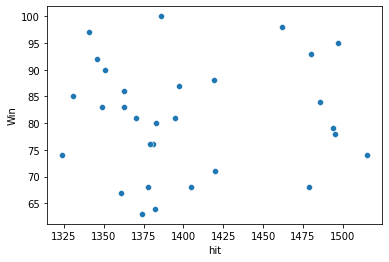

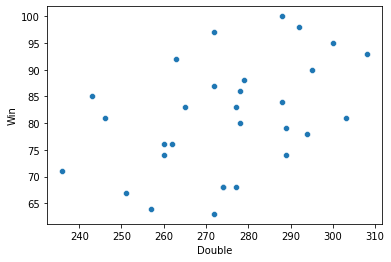

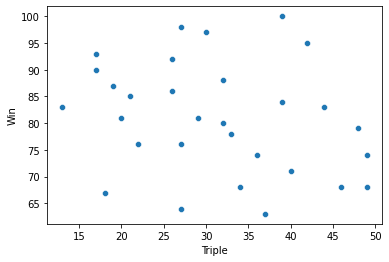

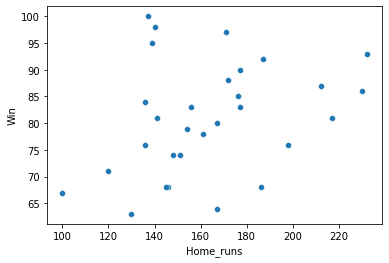

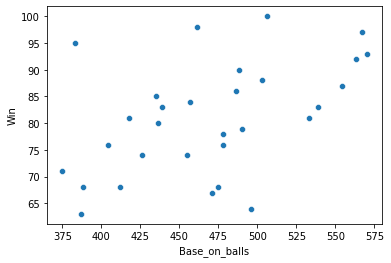

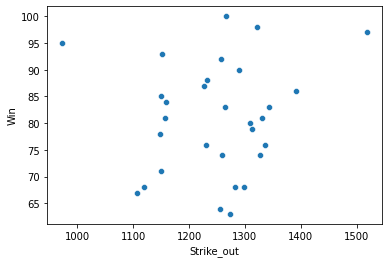

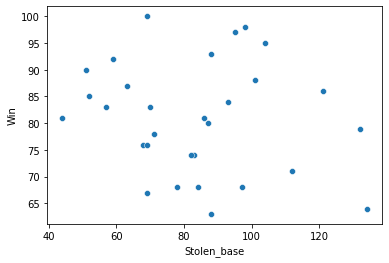

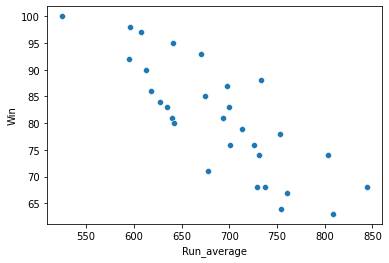

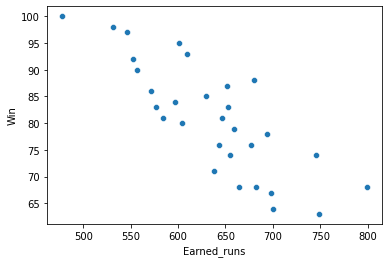

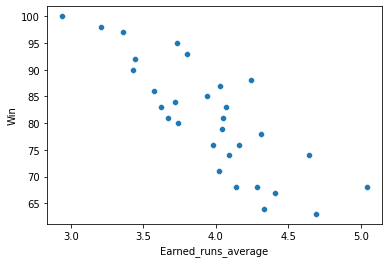

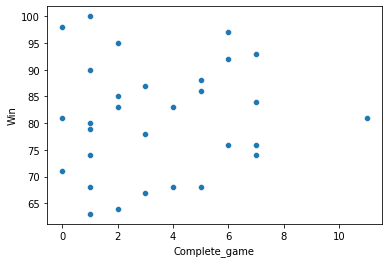

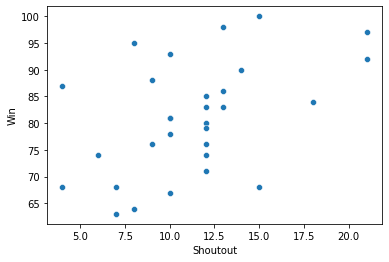

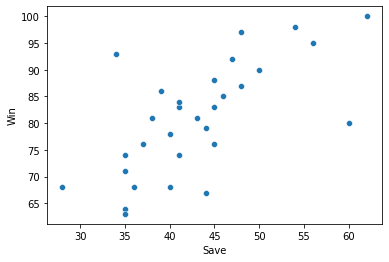

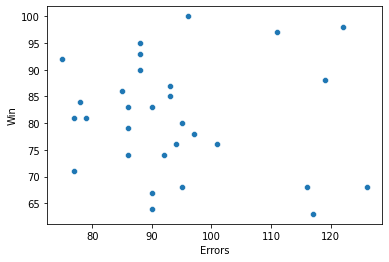

In [ ]:
# Now trying with  scatterplot
for i in df.columns:
  sns.scatterplot(x=df[i],y=df['Win'])
  plt.show()

In [ ]:
#To measure its linearity
df1=df.corr()
df1

,Win,Runs_scored,At_bat,hit,Double,Triple,Home_runs,Base_on_balls,Strike_out,Stolen_base,Run_average,Earned_runs,Earned_runs_average,Complete_game,Shoutout,Save,Errors
Win,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs_scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At_bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
hit,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Double,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triple,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home_runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base_on_balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strike_out,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen_base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


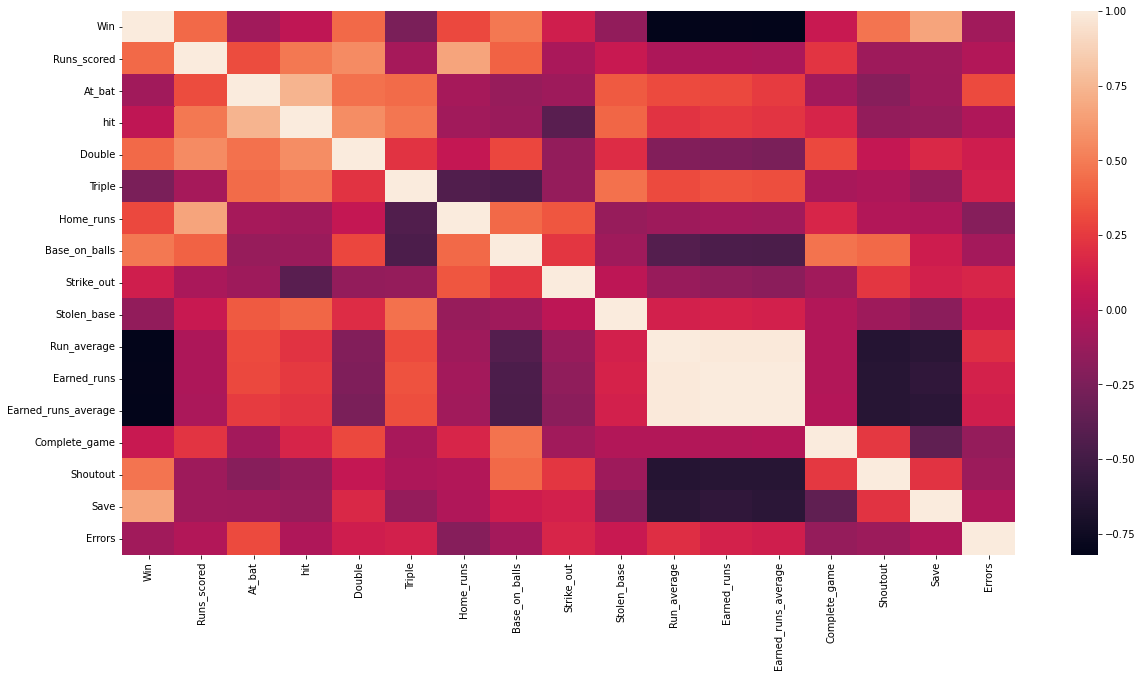

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df1)

# **3.Feature engineering**

In [ ]:
# so now we are filtering the value above 0.35 and - 0.35 
# because from the above step we get to know that multicollinearity exists

corre=df[list(df1[(df1['Win']>0.35) | (df1['Win']<-0.35)].index)]
corre.corr()

,Win,Runs_scored,Double,Base_on_balls,Run_average,Earned_runs,Earned_runs_average,Shoutout,Save
Win,1.000000,0.430751,0.427797,0.484342,-0.812952,-0.809435,-0.819600,0.471805,0.666530
Runs_scored,0.430751,1.000000,0.560084,0.402452,-0.041623,-0.041245,-0.049281,-0.103274,-0.096380
Double,0.427797,0.560084,1.000000,0.302700,-0.218160,-0.235531,-0.254854,0.057998,0.171576
Base_on_balls,0.484342,0.402452,0.302700,1.000000,-0.416445,-0.452663,-0.459832,0.426004,0.099445
Run_average,-0.812952,-0.041623,-0.218160,-0.416445,1.000000,0.991018,0.986674,-0.636862,-0.616224
Earned_runs,-0.809435,-0.041245,-0.235531,-0.452663,0.991018,1.000000,0.997248,-0.630192,-0.589663
Earned_runs_average,-0.819600,-0.049281,-0.254854,-0.459832,0.986674,0.997248,1.000000,-0.630833,-0.607005
Shoutout,0.471805,-0.103274,0.057998,0.426004,-0.636862,-0.630192,-0.630833,1.000000,0.221639
Save,0.666530,-0.096380,0.171576,0.099445,-0.616224,-0.589663,-0.607005,0.221639,1.000000


In [ ]:
# removing the column with highest multicollinearity

m_colli=corre.drop(columns=['Run_average','Earned_runs','Shoutout'])
m_colli.columns

Index(['Win', 'Runs_scored', 'Double', 'Base_on_balls', 'Earned_runs_average',
       'Save'],
      dtype='object')

In [ ]:
X=m_colli.drop(columns='Win')
y=m_colli['Win']

# ***Removing Outliers***

In [ ]:
# for i in X.columns:
#   X.loc[X[i]>X[i].quantile(0.90),i]=X[i].quantile(0.90)
#   X.loc[X[i]<X[i].quantile(0.10),i]=X[i].quantile(0.10)

Tried Removing outliers and got a very bad score 

 Note : It is risk to remove outliers in such a small dataset it can lead to losing important data 

# **4.Data Preprocessing**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
Sca=StandardScaler()
Sca.fit(X_train)
X_train=Sca.transform(X_train)
X_test=Sca.transform(X_test)

# 5.Building models 

# **Support Vector Machine**

In [ ]:
sv=svm.SVR(kernel='linear',C=10,gamma=0.01)
sv.fit(X_train,y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_train_pred=sv.predict(X_train)
y_test_pred=sv.predict(X_test)

In [ ]:
r2_score(y_train,y_train_pred)

0.8482450383894551

In [ ]:
r2_score(y_test,y_test_pred)

0.71214707226763

# ***Grid Search CV on SVM***

In [ ]:
sv=svm.SVR(kernel='linear',C=40,gamma=0.001)
cross_val_score(sv,X_train,y_train,scoring='r2')

array([0.83122634, 0.92090045, 0.67287171, 0.71714056, 0.86586494])

In [ ]:
param_={'kernel':['poly','linear','rbf'],'C':[0.001,0.01,0.1,1,10,0.0001,20,50,80,100,120,150,200],'gamma':[0.01,0.1,1,10,0.001,0.0001]}
sv1=svm.SVR()
grid=GridSearchCV(sv1,param_grid=param_,cv=5,scoring='r2')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 0.0001, 20, 50, 80, 100,
                               120, 150, 200],
                         'gamma': [0.01, 0.1, 1, 10, 0.001, 0.0001],
                         'kernel': ['poly', 'linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
grid.best_params_

{'C': 80, 'gamma': 0.01, 'kernel': 'linear'}

In [ ]:
y_train_pred=grid.predict(X_train)
y_test_pred=grid.predict(X_test)

In [ ]:
r2_score(y_train,y_train_pred)

0.9105314555956134

In [ ]:
r2_score(y_test,y_test_pred)

0.8380637096190726

In [ ]:
r2_score(y_train,y_train_pred)

0.9105314555956134

In [ ]:
X_train.shape

(22, 5)

In [ ]:
sv=svm.SVR(kernel='linear',C=20, gamma=0.01,epsilon=1)
cross=cross_val_score(sv, X_train, y_train,scoring='r2', cv=3)
cross

array([0.75922882, 0.71325013, 0.78864628])

In [ ]:
#mean of validation score
np.mean(cross)

0.7537084093597972

In [ ]:
# standard deviation of validation scores
np.std(cross)

0.031026883463639316

# ***Decision Tree***

In [ ]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_train_pred=dtr.predict(X_train)
y_test_pred=dtr.predict(X_test)

In [ ]:
r2_score(y_train,y_train_pred)

1.0

In [ ]:
r2_score(y_test,y_test_pred)

0.5418947368421052

# Grid Search CV with decision Tree

In [ ]:
param={'max_depth':[3,2,4,5,6,7,8,9],'min_samples_split':[1,2,3,4,5], 'min_impurity_split':[1,2,3,4,5],'max_features':[1,2,3,4,5,6]}
dt=DecisionTreeRegressor()
dtgrid=GridSearchCV(dt, param_grid=param,cv=3)
dtgrid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 2, 4, 5, 6, 7, 8, 9],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_

In [ ]:
# checking the best parameters
dtgrid.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_impurity_split': 2,
 'min_samples_split': 3}

In [ ]:
# using the best parameters for cross validation
dt1=DecisionTreeRegressor(max_depth=9, min_samples_split= 3)
cro=cross_val_score(dt1, X_train, y_train,scoring='r2')
cro

array([-1.90909091, -1.14766289, -0.51650485, -0.30425379,  0.24057355])

In [ ]:
np.mean(cro)

-0.727387777056969

In [ ]:
np.std(cro)

0.7393938843109257

We can still see that there is still overfitting

# ***XGBoost***

In [ ]:
xb=xgb.XGBRegressor(n_estimators=100,min_child_weight=1)
xb.fit(X_train,y_train)

[17:20:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_train_pred=xb.predict(X_train)
y_test_pred=xb.predict(X_test)

In [ ]:
r2_score(y_train,y_train_pred)

0.9997107877960953

In [ ]:
r2_score(y_test,y_test_pred)

0.7327376860678196

# XGboost with Grid Search CV

In [ ]:
lr2=xgb.XGBRegressor(n_estimators=100,min_child_weight=1)


[15:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-0.83338746,  0.30894739,  0.30988293,  0.45984472,  0.34606095])

In [ ]:
param={'booster':['gblinear','gbtree','dart'],'max_depth':[3,2,4,5,6,7,8,9],'min_child_weight':[1,2,3,4,5]}
xgb1=xgb.XGBRegressor()
xgb_grid=GridSearchCV(xgb1, param_grid=param,cv=5)
xgb_grid.fit(X_train,y_train)

[15:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'booster': ['gblinear', 'gbtree', 'dart'],
                         'max_depth': [3, 2, 4, 5, 6, 7, 8, 9],


In [ ]:
y_train_pred=xgb_grid.predict(X_train)
y_test_pred=xgb_grid.predict(X_test)

In [ ]:
r2_score(y_train,y_train_pred)

0.9853668795738983

In [ ]:
r2_score(y_test,y_test_pred)

0.5853709118010378

In [ ]:
xgb_grid.best_params_

{'booster': 'gbtree', 'max_depth': 3, 'min_child_weight': 5}

In [ ]:
cross1=cross_val_score(lr2, X_train, y_train,scoring='r2')
cross1

[17:08:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-0.83338746,  0.30894739,  0.46110679,  0.45984472,  0.34606095])

In [ ]:
np.mean(cross1)

0.11826970716409488

In [ ]:
np.std(cross1)

0.47901718366124413

# **Linear Regression**

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# This are the Coefficients

lr.coef_

array([ 4.25555187,  0.10545447, -0.1733458 , -4.71779698,  4.43439647])

In [ ]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [ ]:
r2_score(y_train,y_train_pred)

0.9203006380420751

In [ ]:
r2_score(y_test,y_test_pred)

0.8203596379530629

In [ ]:
lr1=LinearRegression()


In [ ]:
# checking the cross validation score
cr=cross_val_score(lr1,X_train,y_train,scoring='r2')
cr

array([0.80680148, 0.93505833, 0.63711478, 0.82234132, 0.85518643])

In [ ]:
#mean of cross validation score
np.mean(cr)

0.81130046654181

In [ ]:
# std of validation scores
np.std(cr)

0.09769829413557161

# **Ridge Regression**

In [ ]:
rid=Ridge()

In [ ]:
rid.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_train_pred=rid.predict(X_train)
y_test_pred=rid.predict(X_test)

In [ ]:
r2_score(y_train,y_train_pred)

0.9188046217849875

In [ ]:
r2_score(y_test,y_test_pred)

0.8174205167435429

**Cross validation score**

In [ ]:
rid1=Ridge()

In [ ]:
# checking the cross validation score
Cro=cross_val_score(rid,X_train,y_train,scoring='r2')
Cro

array([0.84840099, 0.92704088, 0.65505837, 0.80978663, 0.82858817])

In [ ]:
#mean of cross validation score
np.mean(Cro)

0.8137750072894846

In [ ]:
# std of validation scores
np.std(Cro)

0.08883065180045596

# **Ridge Regression on Grid Search CV**

In [ ]:
rid1=Ridge()

In [ ]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge1=GridSearchCV(rid1,parameters,scoring='r2',cv=5)

In [ ]:
ridge1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
y_train_pred=ridge1.predict(X_train)
y_test_pred=ridge1.predict(X_test)

In [ ]:
r2_score(y_train,y_train_pred)

0.9188046217849875

In [ ]:
r2_score(y_test,y_test_pred)

0.8174205167435429

In [ ]:
ridge1.best_params_

{'alpha': 1}

In [ ]:
Cr=cross_val_score(ridge1, X_train, y_train,scoring='r2')
Cr

array([0.84840099, 0.92704088, 0.65505837, 0.75342437, 0.85491634])

In [ ]:
np.mean(Cr)

0.8077681903026445

In [ ]:
np.std(Cr)

0.09420561158306978

According to cross validation score the best score is given by Linear Regression the mean is 81 and standard Deviation is less than other model

# **After trying all the above models and hyperparameter tuning,Linear Regression gave some better results with the mean cross validation r2 score of 81% and the standard deviation of those scores being just 9%. R2 score on test set also is 81%.**

# **Saving the Model**

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
import pickle

In [ ]:
# Save the trained model as a pickle string.
savemodel = pickle.dumps(lr)
 
# Load the pickled model
lr_from_pickle = pickle.loads(savemodel)
 
# Use the loaded pickled model to make predictions
lr_from_pickle.predict(X_test)

array([ 83.64910221, 102.68083975,  68.2212227 ,  91.50468465,
        92.0341688 ,  80.05613815,  75.9017068 ,  63.40815385])